In [40]:
import os
from voc12 import my_dataloader
from tqdm import tqdm
import numpy as np
from utility import image_util
import matplotlib.pyplot as plt

In [36]:
sem_seg_root = "../result/sem_seg/"
gt_root = "../Dataset/VOC2012/SegmentationClass/"

all_iou_values = np.load("../result/all_iou_values.npy", allow_pickle=True).item()


In [37]:
def compute_iou(gt, pred):
    label = np.unique(gt)
    label = [x for x in label if x not in [255, 0]]
    
    iou_list = []
    
    for cls in label:
        mask_gt_class = np.where(gt == cls, 1, 0)
        mask_pred_class = np.where(pred == cls, 1, 0)

        intersection = np.logical_and(mask_gt_class, mask_pred_class)
        union = np.logical_or(mask_gt_class, mask_pred_class)
        
        if np.sum(union) == 0:
            return 0.0

        iou = np.sum(intersection) / np.sum(union)
        iou_list.append(iou)
        
    return np.average(np.array(iou_list))

100%|██████████| 1524/1524 [00:11<00:00, 137.99it/s]


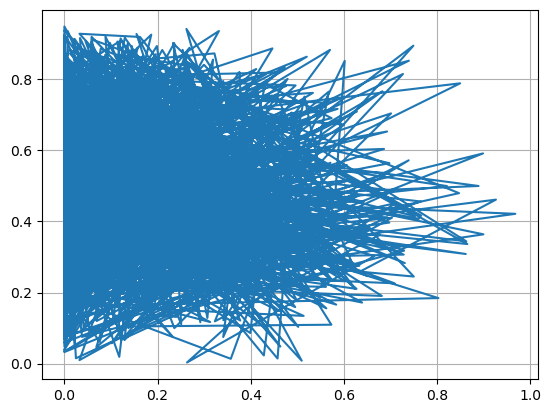

In [42]:
x_list = []
y_list = []
for name in tqdm(all_iou_values.keys()):
    sem_seg_path = os.path.join(sem_seg_root, name + ".png")
    gt_path = os.path.join(gt_root, name +".png")
    
    sem_seg = image_util.read_image(sem_seg_path)
    gt = image_util.read_image(gt_path)
    
    BOR = all_iou_values[name]
    
    iou = compute_iou(gt, sem_seg)
    
    x_list.append(BOR)
    y_list.append(iou)
    

    

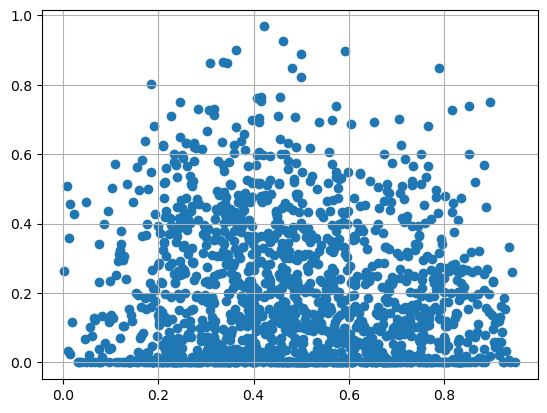

In [44]:
plt.scatter(y_list, x_list, label='Points')
plt.grid()
plt.show()